In [98]:
def plot_histogram_for_duration(event_props_dict, variable, duration, duration_variable, ax, bins=25, label=None, color=None, alpha=0.5):
    """
    Plots a histogram for a specified variable for a given duration category on a specified axis.

    Parameters:
    - event_props_dict: Dictionary containing event properties.
    - variable: The variable to plot (e.g., 'Volume' or 'Intensity').
    - duration: The specific duration category to plot.
    - ax: The axis to plot on.
    - bins: Number of bins for the histogram (default is 10).
    """
    # Step 1: Convert event_props_dict to a pandas DataFrame
    data = []
    for event, props in event_props_dict.items():
        data.append({variable: props[variable], 'Duration': props[duration_variable]})

    df = pd.DataFrame(data)

    # Filter the DataFrame for the specified duration
    duration_data = df[df['Duration'] == duration]

    # Plot histogram for the specified duration
    if not duration_data.empty:
        ax.hist(duration_data[variable], bins=bins, alpha=alpha, label = label, color = color, edgecolor='black')
        #ax.set_title(f"{variable} Distribution - {duration}", fontsize=12)
        #ax.grid(True)
    else:
        pass
        #ax.set_title(f"{variable} Distribution - {duration} (No Data)", fontsize=12)
        #ax.grid(True)

    # Set y-axis label to the specific duration bin it refers to
    ax.set_ylabel(f"{duration}hrs", fontsize=10, rotation=0)
    # Remove y-tick labels
    ax.set_yticks([])

In [1]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(1, '../')
from SeasonalPlot_Functions import *

In [2]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [3]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_mapping_thirds = {1: 'F', 2: 'C', 3: 'B'}

In [4]:
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/results_each_dur_present.pickle", 'rb') as handle:
    results_present = pickle.load(handle)
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/results_each_dur_future.pickle", 'rb') as handle:
    results_future = pickle.load(handle)

In [15]:
with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/event_props_dict_present.pickle", 'rb') as handle:
    events_props_dict_present = pickle.load(handle)
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/event_props_dict_future.pickle", 'rb') as handle:
    events_props_dict_future = pickle.load(handle)    

In [11]:
dur_present_events_dict, dur_present_event_props_dict, dur_present_event_profiles_dict = results_present
dur_future_events_dict, dur_future_event_props_dict, dur_future_event_profiles_dict = results_future

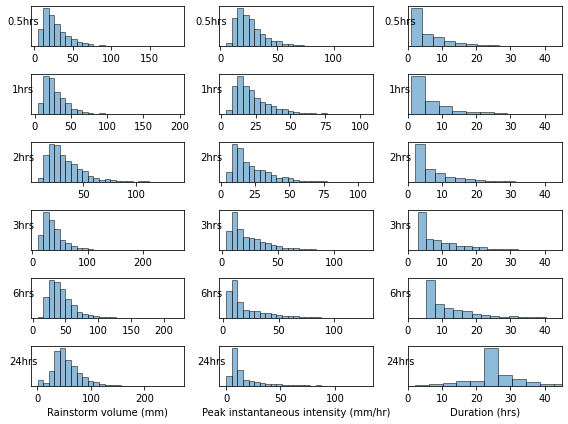

In [60]:
# custom_duration_order = ['19.25+ hr', '6.45-19.25 hr', '2.10-6.45 hr', '0.25-2.10 hr', 'nan']
durations = ['0.5', '1','2', '3', '6', '24']

# Create a figure with subplots for different variables
n_categories = len(durations)
n_variables = 3  # For Volume and Intensity
fig, axs = plt.subplots(n_categories, n_variables, figsize=(8, 1 * n_categories), sharex=False)  # 2 columns for different variables

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='Volume', duration=duration,duration_variable= "dur_for_which_this_is_amax", ax=axs[i, 0])
    plot_histogram_for_duration(events_props_dict_present, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax",  ax=axs[i, 1])
    plot_histogram_for_duration(events_props_dict_present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax",  ax=axs[i, 2])
    # Set x-axis labels for each column
    if i ==5:
        axs[i, 0].set_xlabel("Rainstorm volume (mm)", fontsize=10)
        axs[i, 1].set_xlabel("Peak instantaneous intensity (mm/hr)", fontsize=10)
        axs[i, 2].set_xlabel("Duration (hrs)", fontsize=10)
        
    axs[i, 2].set_xlim(0, 45)   
#     axs[2, 1].set_xlim(0, 30)   
#     axs[2, 2].set_xlim(0, 30)   
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

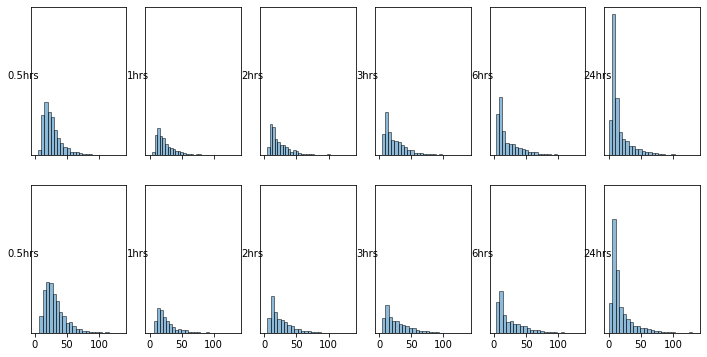

In [83]:
# custom_duration_order = ['19.25+ hr', '6.45-19.25 hr', '2.10-6.45 hr', '0.25-2.10 hr', 'nan']
durations = ['0.5', '1','2', '3', '6', '24']

# Create a figure with subplots for different variables
n_categories = len(durations)
n_variables = 2  # For Volume and Intensity
fig, axs = plt.subplots(n_variables, n_categories, figsize=(2 * n_categories, 6), sharex=True, sharey=True)  # 2 columns for different variables

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='max_intensity', duration=duration,duration_variable= "dur_for_which_this_is_amax", ax=axs[0, i])
    plot_histogram_for_duration(events_props_dict_future, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax",  ax=axs[1, i])
#     # Set x-axis labels for each column
#     if i ==5:
#         axs[i, 0].set_xlabel("Intensity (mm/hr)", fontsize=10)
#         axs[i, 1].set_xlabel("Intensity (mm/hr)", fontsize=10)
    
#     axs[0, 0].set_title("UKCP18 (Present)", fontsize=10)
#     axs[0, 1].set_title("UKCP18 (Future)", fontsize=10)
    
# # Adjust layout to prevent overlap
# plt.tight_layout()

# Show the plot
plt.show()

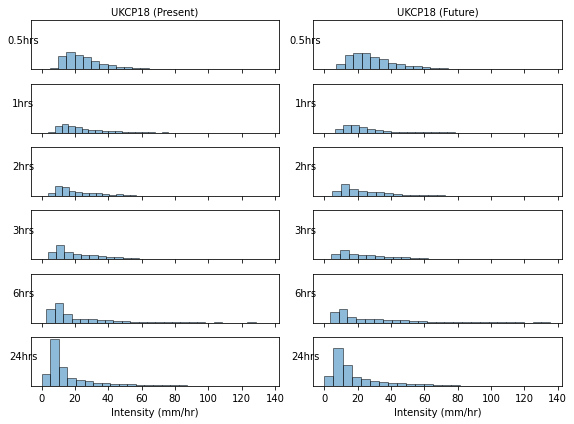

In [86]:
# custom_duration_order = ['19.25+ hr', '6.45-19.25 hr', '2.10-6.45 hr', '0.25-2.10 hr', 'nan']
durations = ['0.5', '1','2', '3', '6', '24']

# Create a figure with subplots for different variables
n_categories = len(durations)
n_variables = 2  # For Volume and Intensity
fig, axs = plt.subplots(n_categories, n_variables, figsize=(8, 1 * n_categories), sharex=True, sharey=True)  # 2 columns for different variables

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='max_intensity', duration=duration,duration_variable= "dur_for_which_this_is_amax", ax=axs[i, 0])
    plot_histogram_for_duration(events_props_dict_future, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax",  ax=axs[i, 1])
    # Set x-axis labels for each column
    if i ==5:
        axs[i, 0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i, 1].set_xlabel("Intensity (mm/hr)", fontsize=10)
        
    axs[0, 0].set_title("UKCP18 (Present)", fontsize=10)
    axs[0, 1].set_title("UKCP18 (Future)", fontsize=10)
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# custom_duration_order = ['19.25+ hr', '6.45-19.25 hr', '2.10-6.45 hr', '0.25-2.10 hr', 'nan']
durations = ['0.5', '1','2', '3', '6', '24']

# Create a figure with subplots for different variables
n_categories = len(durations)
n_variables = 2  # For Volume and Intensity
fig, axs = plt.subplots(n_categories, n_variables, figsize=(8, 1 * n_categories), sharex=True, sharey=True)  # 2 columns for different variables

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='Volume', duration=duration,duration_variable= "dur_for_which_this_is_amax", ax=axs[i, 0])
    plot_histogram_for_duration(events_props_dict_future, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax",  ax=axs[i, 1])
    # Set x-axis labels for each column
    if i ==5:
        axs[i, 0].set_xlabel("Rainstorm volume (mm)", fontsize=10)
        axs[i, 1].set_xlabel("Rainstorm volume (mm)", fontsize=10)
    
    axs[0, 0].set_title("UKCP18 (Present)", fontsize=10)
    axs[0, 1].set_title("UKCP18 (Future)", fontsize=10)
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

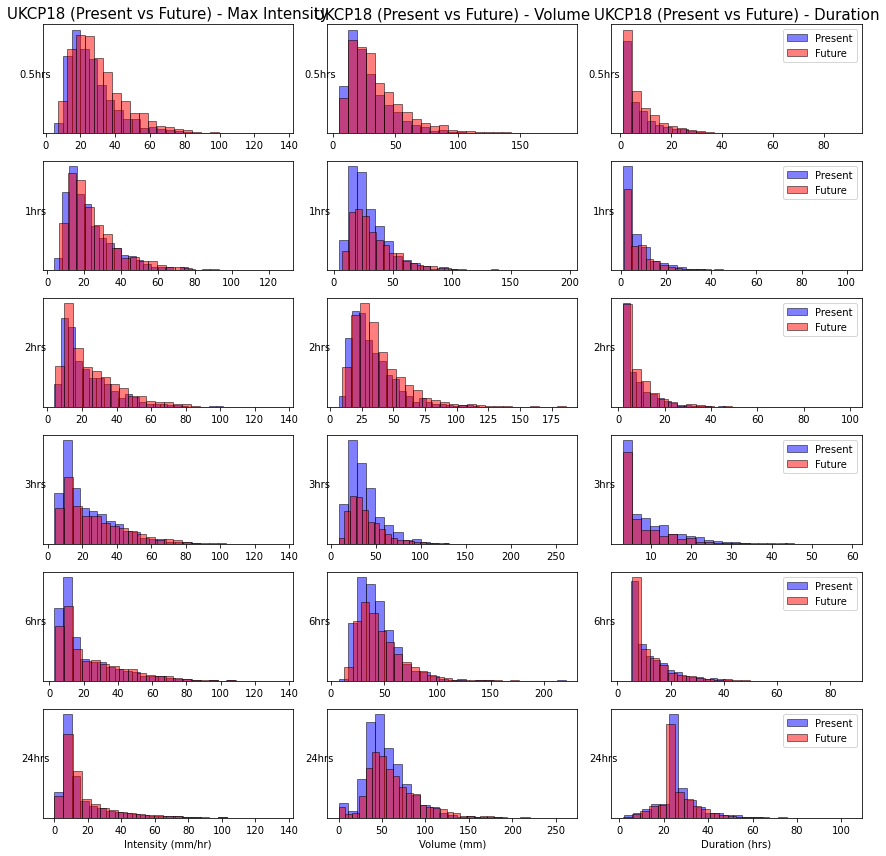

In [118]:
durations = ['0.5', '1', '2', '3', '6', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories, n_variables, figsize=(12, 2 * n_categories))  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=25, label="Future", color='red', alpha=0.5)
    
    plot_histogram_for_duration(events_props_dict_present, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=25, label="Future", color='red', alpha=0.5)
        
    plot_histogram_for_duration(events_props_dict_present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=25, label="Future", color='red', alpha=0.5)
                
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Duration (hrs)", fontsize=10)
    
    axs[0,0].set_title("UKCP18 (Present vs Future) - Max Intensity", fontsize=15)
    axs[0,1].set_title("UKCP18 (Present vs Future) - Volume", fontsize=15)
    axs[0,2].set_title("UKCP18 (Present vs Future) - Duration", fontsize=15)
    
    axs[i,2].legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



In [128]:
# Extract 'D50_index' values from each inner dictionary
d50_values = []

for key, inner_dict in events_props_dict_present.items():
    if 'D50_index' in inner_dict:
        d50_values.append(inner_dict['D50_index'])

max(d50_values)

139

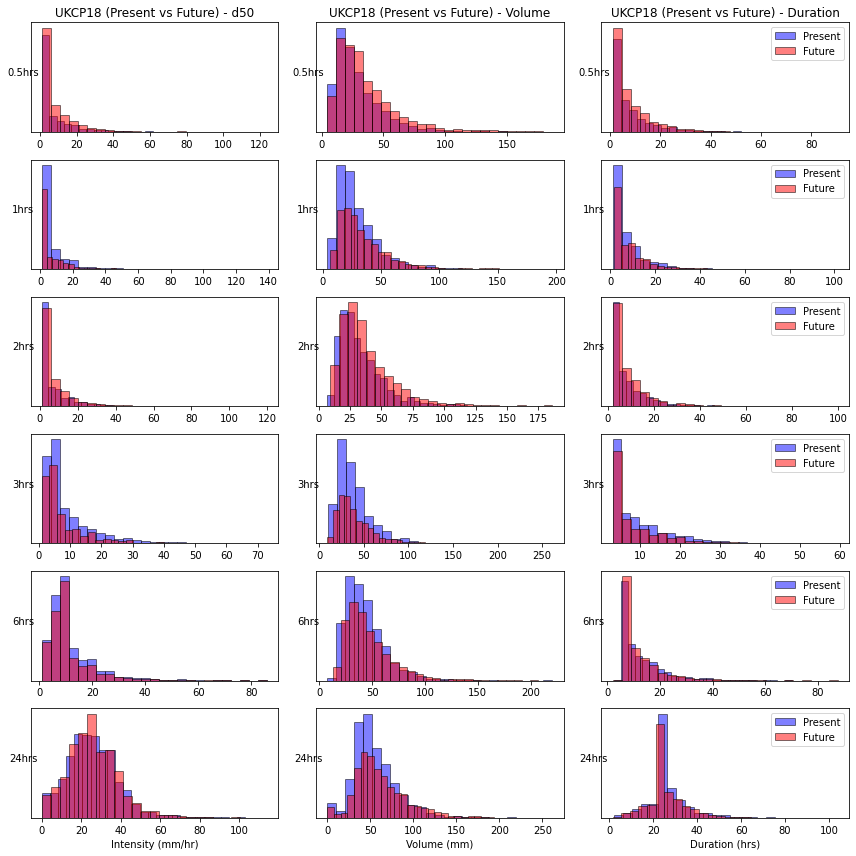

In [123]:
durations = ['0.5', '1', '2', '3', '6', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories, n_variables, figsize=(12, 2 * n_categories))  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(events_props_dict_present, variable='D50_index', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='D50_index', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=25, label="Future", color='red', alpha=0.5)
    
    plot_histogram_for_duration(events_props_dict_present, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=25, label="Future", color='red', alpha=0.5)
        
    plot_histogram_for_duration(events_props_dict_present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=25, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(events_props_dict_future, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=25, label="Future", color='red', alpha=0.5)
                
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Duration (hrs)", fontsize=10)
    
    axs[0,0].set_title("UKCP18 (Present vs Future) - d50", fontsize=12)
    axs[0,1].set_title("UKCP18 (Present vs Future) - Volume", fontsize=12)
    axs[0,2].set_title("UKCP18 (Present vs Future) - Duration", fontsize=12)
    
    axs[i,2].legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

